# Parameter fitting

In [16]:
import numpy as np
from matplotlib import pyplot as plt

# global settings for plots
plt.rcParams.update({
    'axes.labelsize': 'large',
    'axes.labelweight': 'bold',
    'axes.titlesize': 'medium',
    'axes.titleweight': 'bold',
    'legend.fontsize': 'small',
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large',
    'figure.facecolor': '1.00'
})

## Particle Swarm Optimization (PSO)

Particle swarm optimization solves a problem by 
- having a population of candidate solutions, here dubbed particles
- moving these particles around in the search-space according to simple mathematical formulae over the particle's position and velocity. 
- Each particle's movement is influenced by its local best known position, but is also guided toward the best known positions in the search-space, which are updated as better positions are found by other particles.

<img src="./fitting/particleswarm.gif">

https://en.wikipedia.org/wiki/Particle_swarm_optimization

- PSO is a metaheuristic: makes few or no assumptions about the problem being optimized
- can search very large spaces of candidate solutions. 
- However, metaheuristics such as PSO do not guarantee an optimal solution is ever found. 
- PSO does not use the gradient of the problem being optimized, which means PSO does not require that the optimization problem be differentiable as is required by classic optimization methods such as gradient descent and quasi-newton methods. 

## Steepest descent (gradient descent)
In the foloowing example we apply the gradient descent algorithm to find a local minima in a 1 dimensional function:


Function $F{(x)}=x^{4}-3x^{3}+2$, 

with derivative $F'{(x)}=4x^{3}-9x^{2}$ 

and second derivative $F''{(x)}=12x^{2}-9x$

https://en.wikipedia.org/wiki/Gradient_descent

We can easily calculate the minima analytically via $F(x)=0$ as $x_1=0$ and $x_2=9/4=2.25$.

$F''{(x_2)} = 12 \cdot (9/4)^2 - 9 \cdot 9/4 =40.5> 0$

In [17]:
12* (9/4)**2 - 9*9/4

40.5

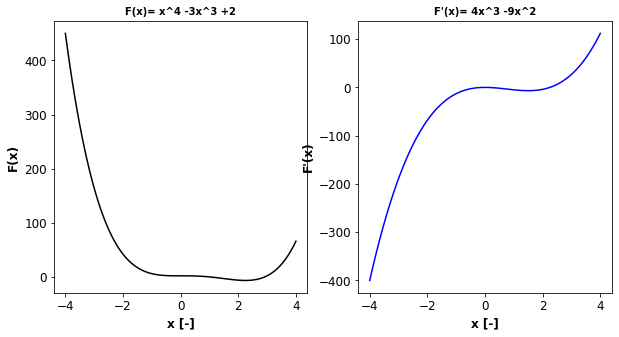

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1.set_title("F(x)= x^4 -3x^3 +2")
ax1.set_ylabel("F(x)")
ax2.set_title("F'(x)= 4x^3 -9x^2")
ax2.set_ylabel("F'(x)")

x = np.linspace(-4, 4, num=100)
F = np.power(x, 4) - 3*np.power(x, 3) +2
dFdx = 4*np.power(x, 3) - 9*np.power(x, 2)
for ax in (ax1, ax3):
    ax.plot(x, F, color="black", label="F(x)")
for ax in (ax2, ax4):
    ax.plot(x, dFdx, color="blue", label="F'(x)")

for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel("x [-]")
for ax in (ax3, ax4):
    ax.set_yscale("log")
    
plt.show()

In [3]:
# From calculation, it is expected that the local minimum occurs at x=9/4
import numpy as np

cur_x = 6.0  # The algorithm starts at x=6
gamma = 0.01  # step size multiplier
precision = 0.00001
previous_step_size = 1 
max_iters = 10000 # maximum number of iterations
iters = 0  # iteration counter

fun = lambda x: np.power(x,4) - 3*np.power(x,3) + 2
df = lambda x: 4 * np.power(x,3) - 9 * np.power(x, 2)

x_vals = [cur_x]
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x
    cur_x -= gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)
    iters += 1
    print(cur_x)
    x_vals.append(cur_x)

print("The local minimum occurs at", cur_x)
#The output for the above will be: ('The local minimum occurs at', 2.2499646074278457)

0.5999999999999996
0.6237599999999996
0.6490692731402646
0.6760475763767438
0.704821965498881
0.7355261366038248
0.7682992721113444
0.8032842278686305
0.840624861847519
0.8804622684298664
0.9229296507309586
0.9681455460305634
1.016205130521792
1.067169389942697
1.1210520795330405
1.1778046421472836
1.237299637824332
1.2993137782331108
1.3635123370474889
1.429437442158506
1.4965033788967752
1.5640022802344904
1.6311231270849003
1.6969855549473505
1.7606875094969714
1.821362659674955
1.8782404675959476
1.930700009196379
1.9783089472809865
2.0208417065692057
2.0582751831448975
2.090764845528107
2.118607415721545
2.1421976265432066
2.1619858762300224
2.178441640823547
2.1920251576443675
2.203167862727841
2.2122606942724694
2.2196486877629633
2.2256301304909205
2.2304587076907274
2.234347382687595
2.2374730902946083
2.239981621916576
2.2419923174775156
2.243602351591089
2.2448905184851697
2.2459204946033684
2.2467436015363202
2.2474011148628947
2.2479261740485823
2.2483453500247714
2.248679

In [30]:
x_vals = np.array(x_vals)
x_range = np.arange(0,7,0.1)
print(x_vals)

[6.         0.6        0.62376    0.64906927 0.67604758 0.70482197
 0.73552614 0.76829927 0.80328423 0.84062486 0.88046227 0.92292965
 0.96814555 1.01620513 1.06716939 1.12105208 1.17780464 1.23729964
 1.29931378 1.36351234 1.42943744 1.49650338 1.56400228 1.63112313
 1.69698555 1.76068751 1.82136266 1.87824047 1.93070001 1.97830895
 2.02084171 2.05827518 2.09076485 2.11860742 2.14219763 2.16198588
 2.17844164 2.19202516 2.20316786 2.21226069 2.21964869 2.22563013
 2.23045871 2.23434738 2.23747309 2.23998162 2.24199232 2.24360235
 2.24489052 2.24592049 2.2467436  2.24740111 2.24792617 2.24834535
 2.24867992 2.24894693 2.24915997 2.24932995 2.24946556 2.24957373
 2.24966002 2.24972884 2.24978374 2.24982752 2.24986244 2.2498903
 2.24991251 2.24993022 2.24994435 2.24995562 2.24996461]


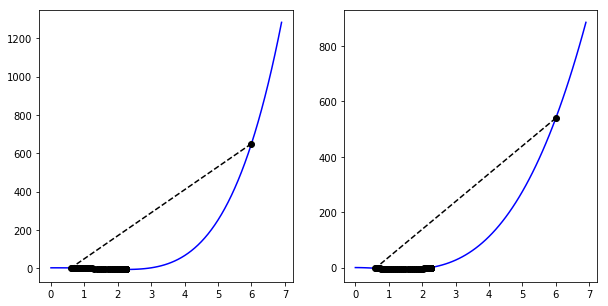

In [42]:
from matplotlib import pyplot as plt
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1.plot(x_range, fun(x_range), '-', color="blue", label="f")
ax1.plot(x_vals, fun(x_vals), 'o--', color="black")
ax2.plot(x_range, df(x_range), '-', color="blue", label="df")
ax2.plot(x_vals, df(x_vals), 'o--', color="black", label="df")
# ax1.set_yscale("log")
# ax1.set_ylim(10E-5, 10E3)


Gradient descent has problems with pathological functions (zig-zag behavior)
The "Zig-Zagging" nature of the method is also evident below, where the gradient descent method is applied to $F\left(x,y\right)=\sin \left({\frac {1}{2}}x^{2}-{\frac {1}{4}}y^{2}+3\right)\cos \left(2x+1-e^{y}\right)$. 

<img src="./fitting/gradient_zigzag.png" width="500"/>